In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tools.eval_measures import mse, rmse
import seaborn as sns
from sqlalchemy import create_engine

%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format

import warnings
warnings.filterwarnings('ignore')

postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'houseprices'

In [2]:
engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))
house_df = pd.read_sql_query('select * from houseprices',con=engine)

engine.dispose()

house_df.head()

,id,mssubclass,mszoning,lotfrontage,lotarea,street,alley,lotshape,landcontour,utilities,...,poolarea,poolqc,fence,miscfeature,miscval,mosold,yrsold,saletype,salecondition,saleprice
0,1,60,RL,65.000,8450,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,2,2008,WD,Normal,208500
1,2,20,RL,80.000,9600,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,5,2007,WD,Normal,181500
2,3,60,RL,68.000,11250,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,9,2008,WD,Normal,223500
3,4,70,RL,60.000,9550,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.000,14260,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,12,2008,WD,Normal,250000


In [3]:
house_df = pd.concat([house_df, pd.get_dummies(house_df.neighborhood, prefix="neighborhood", drop_first=True)], axis=1)

house_df = pd.concat([house_df, pd.get_dummies(house_df.housestyle, prefix="housestyle", drop_first=True)], axis=1)

dummy_column_names = list(pd.get_dummies(house_df.neighborhood, prefix="neighborhood", drop_first=True).columns)

dummy_column_names = list(pd.get_dummies(house_df.housestyle, prefix="housestyle", drop_first=True).columns)

In [4]:
Y = house_df["saleprice"]
X = house_df[["overallqual", "firstflrsf", "garagecars", "totalbsmtsf", "grlivarea"]]

X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size = .2, random_state = 465)

print("The number of observations in training set is {}".format(X_train.shape[0]))
print("The number of observations in test set is {}".format(X_test.shape[0]))

The number of observations in training set is 1168
The number of observations in test set is 292


In [5]:
X_train = sm.add_constant(X_train)

results = sm.OLS(y_train,X_train).fit()

print(results.summary())


                            OLS Regression Results                            
Dep. Variable:              saleprice   R-squared:                       0.760
Model:                            OLS   Adj. R-squared:                  0.758
Method:                 Least Squares   F-statistic:                     734.0
Date:                Fri, 07 Jun 2019   Prob (F-statistic):               0.00
Time:                        09:21:30   Log-Likelihood:                -13993.
No. Observations:                1168   AIC:                         2.800e+04
Df Residuals:                    1162   BIC:                         2.803e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        -1.03e+05   5502.806    -18.712      

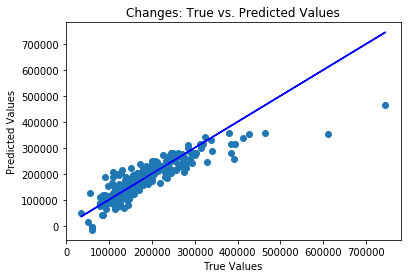

Mean absolute value error of the prediction is: 26202.728061958023
Mean squared error of prediction is: 1573356193.5251143
Root mean squared error of prodiction is: 39665.55424452196
Mean absolute precentage error of the prediction is: 18355716.01803802


In [6]:
X_test = sm.add_constant(X_test)

y_preds = results.predict(X_test)

plt.scatter(y_test, y_preds)
plt.plot(y_test, y_test, color = "Blue")
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.title("Changes: True vs. Predicted Values")
plt.show()

print("Mean absolute value error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds)))
print("Mean squared error of prediction is: {}".format(mse(y_test, y_preds)))
print("Root mean squared error of prodiction is: {}".format(rmse(y_test, y_preds)))
print("Mean absolute precentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds/y_test))*100)))

The model appears to accurately represent the lower sale prices in the graph. It falls off as the home prices get higher. It appears that the true values when they get over $400,000 starts to shoot up and are significantly more than the true values. The statistical values are large, I have nothing to compare them to until I run another model.

In [23]:
house_df['totalsf'] = house_df['totalbsmtsf'] + house_df['firstflrsf'] + house_df['secondflrsf']

house_df['total_houseq'] = house_df['totalsf'] * house_df["overallqual"]

Y2 = house_df["saleprice"]
X2 = house_df[["overallqual", "firstflrsf", "garagecars", "totalbsmtsf", "grlivarea", "lotarea", "totalsf", "total_houseq"]]

X2_train, X2_test, y2_train, y2_test = train_test_split(X2,Y2,test_size = .2, random_state = 465)

print("The number of observations in training set is {}".format(X2_train.shape[0]))
print("The number of observations in test set is {}".format(X2_test.shape[0]))

The number of observations in training set is 1168
The number of observations in test set is 292


In [24]:
X2_train = sm.add_constant(X2_train)

results = sm.OLS(y2_train,X2_train).fit()

print(results.summary())


                            OLS Regression Results                            
Dep. Variable:              saleprice   R-squared:                       0.770
Model:                            OLS   Adj. R-squared:                  0.769
Method:                 Least Squares   F-statistic:                     485.8
Date:                Fri, 07 Jun 2019   Prob (F-statistic):               0.00
Time:                        09:40:32   Log-Likelihood:                -13966.
No. Observations:                1168   AIC:                         2.795e+04
Df Residuals:                    1159   BIC:                         2.800e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -4.968e+04    1.3e+04     -3.824   

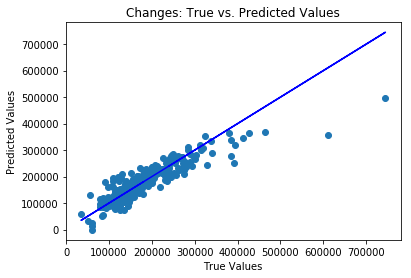

Mean absolute value error of the prediction is: 24552.473339007625
Mean squared error of prediction is: 1379529600.3479898
Root mean squared error of prodiction is: 37142.01933589489
Mean absolute precentage error of the prediction is: 18355715.337918203


In [25]:
X2_test = sm.add_constant(X2_test)

y2_preds = results.predict(X2_test)

plt.scatter(y2_test, y2_preds)
plt.plot(y2_test, y2_test, color = "Blue")
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.title("Changes: True vs. Predicted Values")
plt.show()

print("Mean absolute value error of the prediction is: {}".format(mean_absolute_error(y2_test, y2_preds)))
print("Mean squared error of prediction is: {}".format(mse(y2_test, y2_preds)))
print("Root mean squared error of prodiction is: {}".format(rmse(y2_test, y2_preds)))
print("Mean absolute precentage error of the prediction is: {}".format(np.mean(np.abs((y2_test - y2_preds/y2_test))*100)))

The new model fits a little better, the r-squared value is less and 3 out of four  of the metrics are lower values. In the second model I added total square footage, an interaction between total square footage and quality, and the lot area to improve the fit a little. The line still loses it's accuracy as the sales prices get large. At about $350,000, the line over estimates the sales price.